<a href="https://colab.research.google.com/github/AdrienMarrel/airtraffic/blob/main/Project_MARREL_VASSEUR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pandas.profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.3/352.3 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 61.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=7d0978e14ab4c4dc6f1f0c5a140d94161a1e194887748581140d8b039cbb5547
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attemp

In [ ]:
!pip install mlforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport

<ipython-input-3-98f09099f855>:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


### Visualization

In [ ]:
traffic_df = pd.read_parquet('traffic_10lines.parquet')

In [ ]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254899 entries, 3223247 to 10014282
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date                254899 non-null  datetime64[ns]
 1   pax                 254899 non-null  float64       
 2   seats               250749 non-null  float64       
 3   flight_type         251168 non-null  object        
 4   flight_typename     254899 non-null  object        
 5   home_airport        254899 non-null  object        
 6   paired_airport      254899 non-null  object        
 7   home_airportname    254899 non-null  object        
 8   paired_airportname  254899 non-null  object        
 9   distance            254899 non-null  Int64         
 10  flight_number       251438 non-null  object        
 11  airline_iata        248648 non-null  object        
 12  airline_name        254813 non-null  object        
 13  scheduled_datetime  2

In [ ]:
traffic_df.transpose()

3223247                   3223311   \
date                     2018-08-04 00:00:00       2017-05-03 00:00:00   
pax                                    155.0                     132.0   
seats                                  156.0                     144.0   
flight_type                                J                         J   
flight_typename                    Scheduled                 Scheduled   
home_airport                             LGW                       LGW   
paired_airport                           BCN                       BCN   
home_airportname      London Gatwick Airport    London Gatwick Airport   
paired_airportname                 Barcelone                 Barcelone   
distance                                1109                      1109   
flight_number                        EZY8572                    BA2708   
airline_iata                              U2                        BA   
airline_name                         EasyJet           British Airways   
scheduled_datetime       2018-08-04 12:15:00       2017-05-03 11:20:00   
direction                                  A                         D   
home_country                              GB                        GB   
paired_country                            ES                        ES   
home_countryname              United Kingdom            United Kingdom   
paired_countryname                     Spain                     Spain   
travel_area         International Short-Haul  International Short-Haul   
aircraft_type                            319                       319   

                                    3223347                   3223366   \
date                     2022-08-05 00:00:00       2019-10-16 00:00:00   
pax                                    136.0                     170.0   
seats                                  156.0                     180.0   
flight_type                                J                         J   
flight_typename                    Scheduled                 Scheduled   
home_airport                             LGW                       LGW   
paired_airport                           BCN                       BCN   
home_airportname      London Gatwick Airport    London Gatwick Airport   
paired_airportname                 Barcelone                 Barcelone   
distance                                1109                      1109   
flight_number                        EZY8578                   EJU8569   
airline_iata                              U2                        EC   
airline_name                         EasyJet                   EasyJet   
scheduled_datetime       2022-08-05 21:55:00       2019-10-16 09:10:00   
direction                                  A                         D   
home_country                              GB                        GB   
paired_country                            ES                        ES   
home_countryname              United Kingdom            United Kingdom   
paired_countryname                     Spain                     Spain   
travel_area         International Short-Haul  International Short-Haul   
aircraft_type                            319                       320   

                                    3223425                   3223466   \
date                     2019-01-26 00:00:00       2018-08-25 00:00:00   
pax                                    166.0                     186.0   
seats                                  180.0                     220.0   
flight_type                                J                         J   
flight_typename                    Scheduled                 Scheduled   
home_airport                             LGW                       LGW   
paired_airport                           BCN                       BCN   
home_airportname      London Gatwick Airport    London Gatwick Airport   
paired_airportname                 Barcelone                 Barcelone   
distance                              

In [ ]:
profile_report = ProfileReport(traffic_df)

In [ ]:
profile_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
(traffic_df
 .groupby(['home_airport', 'paired_airport', 'direction'])
 .agg(date_min = ('date', 'min'), date_max = ('date', 'max'), pax = ('pax', 'sum'))
 .reset_index()
);

In [ ]:
traffic_df.query('home_airport == "NTE" and paired_airport == "FUE"')['airline_name'].value_counts()

Volotea                362
Smartwings             140
Transavia               98
Enter Air               81
ASL Airlines France      1
Ryanair                  1
Name: airline_name, dtype: int64

In [ ]:
traffic_df.query('home_airport == "NTE" and paired_airport == "FUE" and pax > 100')['airline_name'].value_counts()

Volotea                339
Smartwings             114
Transavia               90
Enter Air               77
ASL Airlines France      1
Name: airline_name, dtype: int64

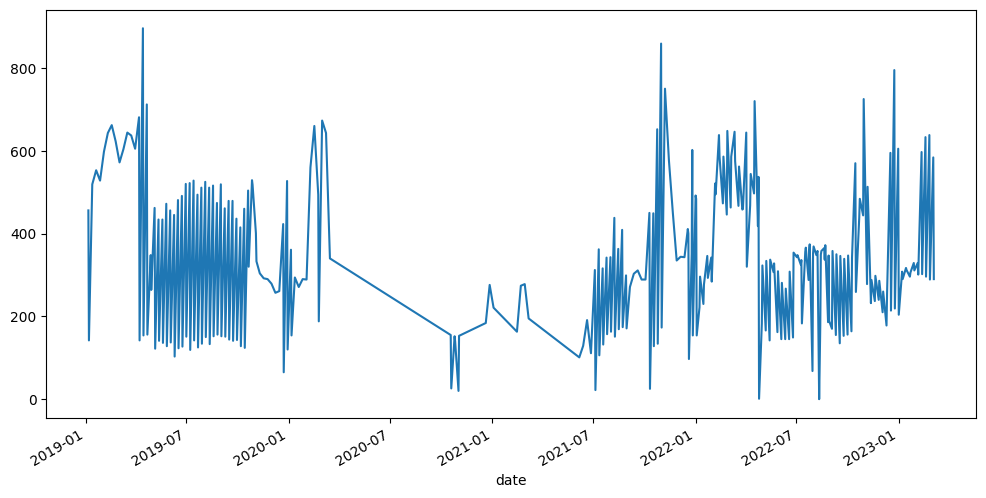

In [ ]:
(traffic_df
 .query('home_airport == "NTE" and paired_airport == "FUE"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total = ('pax', 'sum'))
 .reset_index()
 .set_index('date')['pax_total']
 .plot(figsize = (12,6))
);

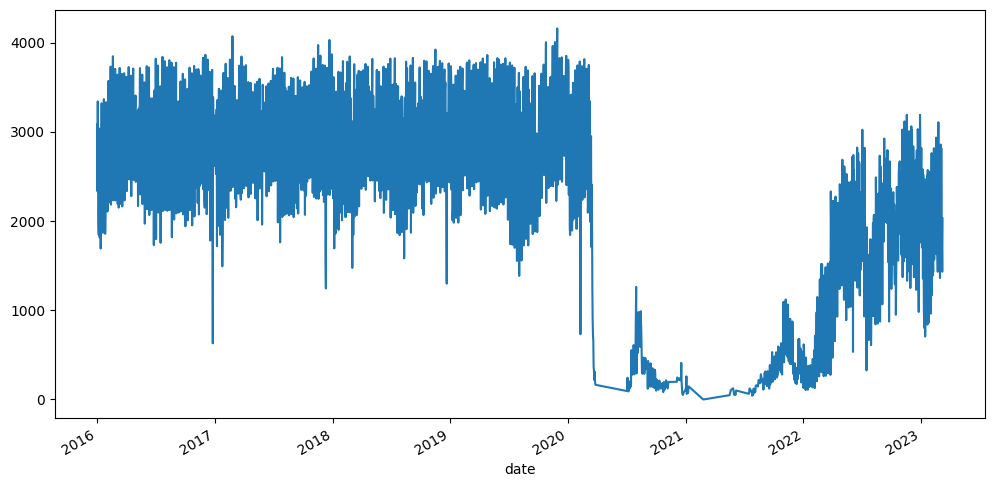

In [ ]:
(traffic_df
 .query('home_airport == "LGW" and paired_airport == "AMS"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total = ('pax', 'sum'))
 .reset_index()
 .set_index('date')['pax_total']
 .plot(figsize = (12,6))
);

In [ ]:
import seaborn as sns
sns.set()

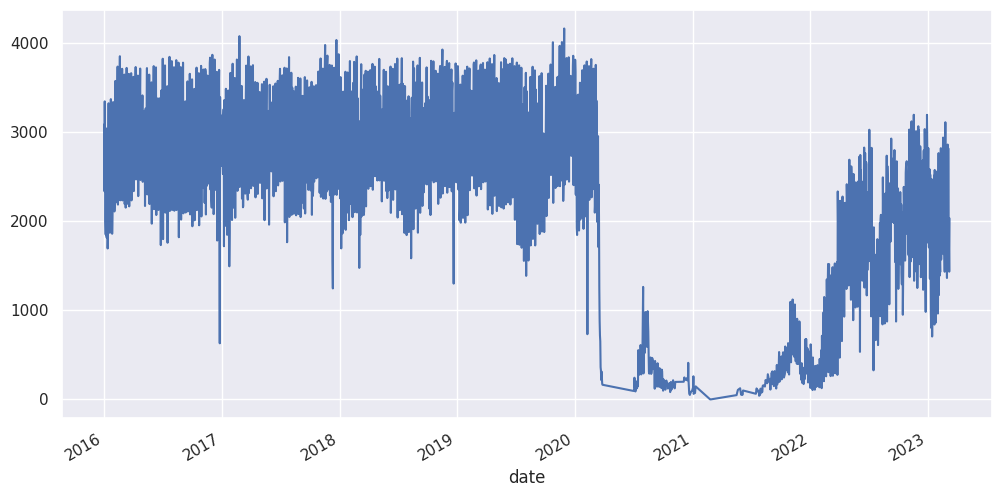

In [ ]:
(traffic_df
 .query('home_airport == "LGW" and paired_airport == "AMS"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total = ('pax', 'sum'))
 .reset_index()
 .set_index('date')['pax_total']
 .plot(figsize = (12,6))
);

In [ ]:
import datetime
import plotly
import pandas as pd

import plotly.offline as pyoff
import plotly.graph_objs as go

from plotly.subplots import make_subplots

def draw_ts_multiple(df: pd.DataFrame, v1: str, v2: str=None, prediction: str=None, date: str='date',
              secondary_y=True, covid_zone=False, display=True):
  """Draw times series possibly on two y axis, with COVID period option.
​
  Args:
  - df (pd.DataFrame): time series dataframe (one line per date, series in columns)
  - v1 (str | list[str]): name or list of names of the series to plot on the first x axis
  - v2 (str): name of the serie to plot on the second y axis (default: None)
  - prediction (str): name of v1 hat (prediction) displayed with a dotted line (default: None)
  - date (str): name of date column for time (default: 'date')
  - secondary_y (bool): use a secondary y axis if v2 is used (default: True)
  - covid_zone (bool): highlight COVID-19 period with a grayed rectangle (default: False)
  - display (bool): display figure otherwise just return the figure (default: True)
​
  Returns:
  - fig (plotly.graph_objs._figure.Figure): Plotly figure generated
​
  Notes:
  Make sure to use the semi-colon trick if you don't want to have the figure displayed twice.
  Or use `display=False`.
  """
  if isinstance(v1, str):
    variables = [(v1, 'V1')]
  else:
    variables = [(v, 'V1.{}'.format(i)) for i, v in enumerate(v1)]
  title = ''.join([n + ': '+ v for v, n in variables]) + ('V2: ' + v2) if v2 else ''.join([v + ': '+ n for v, n in variables])
  layout = dict(
    title=title,
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
  )
  fig = make_subplots(specs=[[{"secondary_y": True}]])
  fig.update_layout(layout)
  for v, name in variables:
    fig.add_trace(go.Scatter(x=df[date], y=df[v], name=name), secondary_y=False)
  if v2:
    fig.add_trace(go.Scatter(x=df[date], y=df[v2], name='V2'), secondary_y=secondary_y)
    fig['layout']['yaxis2']['showgrid'] = False
    fig.update_yaxes(rangemode='tozero')
    fig.update_layout(margin=dict(t=125 + 30 * (len(variables) - 1)))
  if prediction:
    fig.add_trace(go.Scatter(x=df[date], y=df[prediction], name='^V1', line={'dash': 'dot'}), secondary_y=False)

  if covid_zone:
    fig.add_vrect(
        x0=pd.Timestamp("2020-03-01"), x1=pd.Timestamp("2022-01-01"),
        fillcolor="Gray", opacity=0.5,
        layer="below", line_width=0,
    )
  if display:
    pyoff.iplot(fig)
  return fig

In [ ]:
draw_ts_multiple(
    (traffic_df
     .query('home_airport == "LGW" and paired_airport == "AMS"')
     .groupby(['home_airport', 'paired_airport', 'date'])
     .agg(pax_total=('pax', 'sum'))
     .reset_index()
    ),
    'pax_total' 
)

In [ ]:
draw_ts_multiple(
    (traffic_df
     .query('home_airport == "LGW" and paired_airport == "AMS"')
     .groupby(['home_airport', 'paired_airport', 'date'])
     .agg(pax_total=('pax', 'sum'))
     .reset_index()
    ),
    'pax_total',
    covid_zone = True,
)

In [ ]:
nte_fue_df = (traffic_df
 .query('home_airport == "NTE" and paired_airport == "FUE"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total = ('pax', 'sum'))
 .reset_index()
)
nte_fue_df

home_airport paired_airport       date  pax_total
0            NTE            FUE 2019-01-06      456.0
1            NTE            FUE 2019-01-07      142.0
2            NTE            FUE 2019-01-13      519.0
3            NTE            FUE 2019-01-20      553.0
4            NTE            FUE 2019-01-27      528.0
..           ...            ...        ...        ...
288          NTE            FUE 2023-02-19      296.0
289          NTE            FUE 2023-02-25      638.0
290          NTE            FUE 2023-02-26      289.0
291          NTE            FUE 2023-03-04      584.0
292          NTE            FUE 2023-03-05      290.0

[293 rows x 4 columns]

In [ ]:
lgw_ams_df = (traffic_df
 .query('home_airport == "LGW" and paired_airport == "AMS"')
 .groupby(['home_airport', 'paired_airport', 'date'])
 .agg(pax_total = ('pax', 'sum'))
 .reset_index()
)
lgw_ams_df

home_airport paired_airport       date  pax_total
0             LGW            AMS 2016-01-01     3081.0
1             LGW            AMS 2016-01-02     2334.0
2             LGW            AMS 2016-01-03     3341.0
3             LGW            AMS 2016-01-04     2665.0
4             LGW            AMS 2016-01-05     1996.0
...           ...            ...        ...        ...
2243          LGW            AMS 2023-03-05     2815.0
2244          LGW            AMS 2023-03-06     1916.0
2245          LGW            AMS 2023-03-07     1741.0
2246          LGW            AMS 2023-03-08     1432.0
2247          LGW            AMS 2023-03-09     2029.0

[2248 rows x 4 columns]

### First model with facebook prophete

In [ ]:
traffic_df

date    pax  seats flight_type flight_typename home_airport  \
3223247  2018-08-04  155.0  156.0           J       Scheduled          LGW   
3223311  2017-05-03  132.0  144.0           J       Scheduled          LGW   
3223347  2022-08-05  136.0  156.0           J       Scheduled          LGW   
3223366  2019-10-16  170.0  180.0           J       Scheduled          LGW   
3223425  2019-01-26  166.0  180.0           J       Scheduled          LGW   
...             ...    ...    ...         ...             ...          ...   
9977453  2022-04-19   72.0  216.0           J       Scheduled          SCL   
9977758  2020-03-22  162.0  216.0           J       Scheduled          SCL   
9977808  2021-12-23  164.0  313.0           J       Scheduled          SCL   
9995284  2019-04-06  161.0  216.0           J       Scheduled          SCL   
10014282 2022-09-04  191.0  216.0           J       Scheduled          SCL   

         paired_airport                                   home_airportname  \
3223247             BCN                             London Gatwick Airport   
3223311             BCN                             London Gatwick Airport   
3223347             BCN                             London Gatwick Airport   
3223366             BCN                             London Gatwick Airport   
3223425             BCN                             London Gatwick Airport   
...                 ...                                                ...   
9977453             LHR  Comodoro Arturo Merino Benitez International A...   
9977758             LHR  Comodoro Arturo Merino Benitez International A...   
9977808             LHR  Comodoro Arturo Merino Benitez International A...   
9995284             LHR  Comodoro Arturo Merino Benitez International A...   
10014282            LHR  Comodoro Arturo Merino Benitez International A...   

               paired_airportname  distance  ... airline_iata  \
3223247                 Barcelone      1109  ...           U2   
3223311                 Barcelone      1109  ...           BA   
3223347                 Barcelone      1109  ...           U2   
3223366                 Barcelone      1109  ...           EC   
3223425                 Barcelone      1109  ...           U2   
...                           ...       ...  ...          ...   
9977453   London Heathrow Airport     11653  ...           BA   
9977758   London Heathrow Airport     11653  ...           BA   
9977808   London Heathrow Airport     11653  ...           BA   
9995284   London Heathrow Airport     11653  ...           BA   
10014282  London Heathrow Airport     11653  ...           BA   

             airline_name  scheduled_datetime direction home_country  \
3223247           EasyJet 2018-08-04 12:15:00         A           GB   
3223311   British Airways 2017-05-03 11:20:00         D           GB   
3223347           EasyJet 2022-08-05 21:55:00         A           GB   
3223366           EasyJet 2019-10-16 09:10:00         D           GB   
3223425           EasyJet 2019-01-26 06:55:00         D           GB   
...                   ...                 ...       ...          ...   
9977453   British Airways 2022-04-19 07:25:00         A           CL   
9977758   British Airways 2020-03-22 16:45:00         D           CL   
9977808   British Airways 2021-12-23 10:04:00         A           CL   
9995284   British Airways 2019-04-06 08:35:00         A           CL   
10014282  British Airways 2022-09-04 07:59:00         A           CL   

         paired_country home_countryname paired_countryname  \
3223247              ES   United Kingdom              Spain   
3223311              ES   United Kingdom              Spain   
3223347              ES   United Kingdom              Spain   
3223366              ES   United Kingdom              Spain   
3223425              ES   United Kingdom              Spain   
...                 ...              ...                ...   
9977453              GB            Chile     United Ki

In [ ]:
def generate_route_df(traffic_df : pd.DataFrame, homeAirport: str, pairedAirport: str) -> pd.DataFrame:
  """Extract route dataframe from traffic dataframe for route from home airport to paired airport

  Args:
  - traffic_pd (pd.DataFrame): traffic dataframe
  - homeAirport (str): IATA Code for home airport
  - pairedAirport (str): IATA Code for paired airport

  Returns:
  - pd.DataFrame: daily traffic on route (home-paired)
  """
  _df = (traffic_df
         .query('home_airport == "{home}" and paired_airport == "{paired}"'.format(home = homeAirport, paired = pairedAirport))
         .groupby(['home_airport', 'paired_airport', 'date'])
         .agg(pax_total = ('pax', 'sum'))
         .reset_index()
         )
  return _df

In [ ]:
generate_route_df(traffic_df, "LGW", "AMS")

home_airport paired_airport       date  pax_total
0             LGW            AMS 2016-01-01     3081.0
1             LGW            AMS 2016-01-02     2334.0
2             LGW            AMS 2016-01-03     3341.0
3             LGW            AMS 2016-01-04     2665.0
4             LGW            AMS 2016-01-05     1996.0
...           ...            ...        ...        ...
2243          LGW            AMS 2023-03-05     2815.0
2244          LGW            AMS 2023-03-06     1916.0
2245          LGW            AMS 2023-03-07     1741.0
2246          LGW            AMS 2023-03-08     1432.0
2247          LGW            AMS 2023-03-09     2029.0

[2248 rows x 4 columns]

In [ ]:
from prophet import Prophet

In [ ]:
baseline_model = Prophet()
baseline_model.fit(generate_route_df(traffic_df,"NTE", "FUE").rename(columns ={'date': 'ds', 'pax_total':'y'}))

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpagjeuw9p/wnaof09_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpagjeuw9p/4dvk1cgg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2748', 'data', 'file=/tmp/tmpagjeuw9p/wnaof09_.json', 'init=/tmp/tmpagjeuw9p/4dvk1cgg.json', 'output', 'file=/tmp/tmpagjeuw9p/prophet_model6rv2rerj/prophet_model-20230601121001.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:10:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:10:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_df = baseline_model.make_future_dataframe(periods=15) #prepare to predict 15 days
future_df

ds
0   2019-01-06
1   2019-01-07
2   2019-01-13
3   2019-01-20
4   2019-01-27
..         ...
303 2023-03-16
304 2023-03-17
305 2023-03-18
306 2023-03-19
307 2023-03-20

[308 rows x 1 columns]

In [ ]:
forecast_df = baseline_model.predict(future_df)
forecast_df

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2019-01-06  366.987264  326.005775  636.378720   366.987264   366.987264   
1   2019-01-07  366.754933   67.085407  365.320142   366.754933   366.754933   
2   2019-01-13  365.360946  269.967967  559.057556   365.360946   365.360946   
3   2019-01-20  363.734627  261.858114  563.118720   363.734627   363.734627   
4   2019-01-27  362.108309  323.602083  607.770285   362.108309   362.108309   
..         ...         ...         ...         ...          ...          ...   
303 2023-03-16  250.086252  -34.976902  265.830571   250.086252   250.086252   
304 2023-03-17  250.129075  271.980808  563.360307   250.129075   250.129291   
305 2023-03-18  250.171898  329.525941  622.710287   250.171898   250.174290   
306 2023-03-19  250.214721  366.364084  671.030113   250.214721   250.219489   
307 2023-03-20  250.257544  112.904449  410.975457   250.257544   250.267808   

     additive_terms  additive_terms_lower  additive_terms_upper      weekly  \
0        113.963365            113.963365            113.963365  136.806409   
1       -148.140453           -148.140453           -148.140453 -115.899406   
2         56.838713             56.838713             56.838713  136.806409   
3         49.792236             49.792236             49.792236  136.806409   
4        103.916880            103.916880            103.916880  136.806409   
..              ...                   ...                   ...         ...   
303     -132.497205           -132.497205           -132.497205 -256.348557   
304      168.375159            168.375159            168.375159   44.060402   
305      227.954512            227.954512            227.954512  103.260604   
306      261.821769            261.821769            261.821769  136.806409   
307        9.411225              9.411225              9.411225 -115.899406   

     weekly_lower  weekly_upper      yearly  yearly_lower  yearly_upper  \
0      136.806409    136.806409  -22.843043    -22.843043    -22.843043   
1     -115.899406   -115.899406  -32.241047    -32.241047    -32.241047   
2      136.806409    136.806409  -79.967696    -79.967696    -79.967696   
3      136.806409    136.806409  -87.014173    -87.014173    -87.014173   
4      136.806409    136.806409  -32.889528    -32.889528    -32.889528   
..            ...           ...         ...           ...           ...   
303   -256.348557   -256.348557  123.851352    123.851352    123.851352   
304     44.060402     44.060402  124.314757    124.314757    124.314757   
305    103.260604    103.260604  124.693908    124.693908    124.693908   
306    136.806409    136.806409  125.015360    125.015360    125.015360   
307   -115.899406   -115.899406  125.310631    125.310631    125.310631   

     multiplicative_terms  multiplicative_terms_lower  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
..                    ...                         ...   
303                   0.0                         0.0   
304                   0.0                         0.0   
305                   0.0                         0.0   
306                   0.0                         0.0   
307                   0.0                         0.0   

     multiplicative_terms_upper        yhat  
0                           0.0  480.950629  
1                           0.0  218.614479  
2                           0.0  422.199658  
3                           0.0  413.526863  
4                           0.0  466.025189  
..                          ...         ...  
303                         0.0  117.589047  
304                         0.0  418.504234  
305                         0.0  478.126410  
306                         0.0  512.036491  
307       

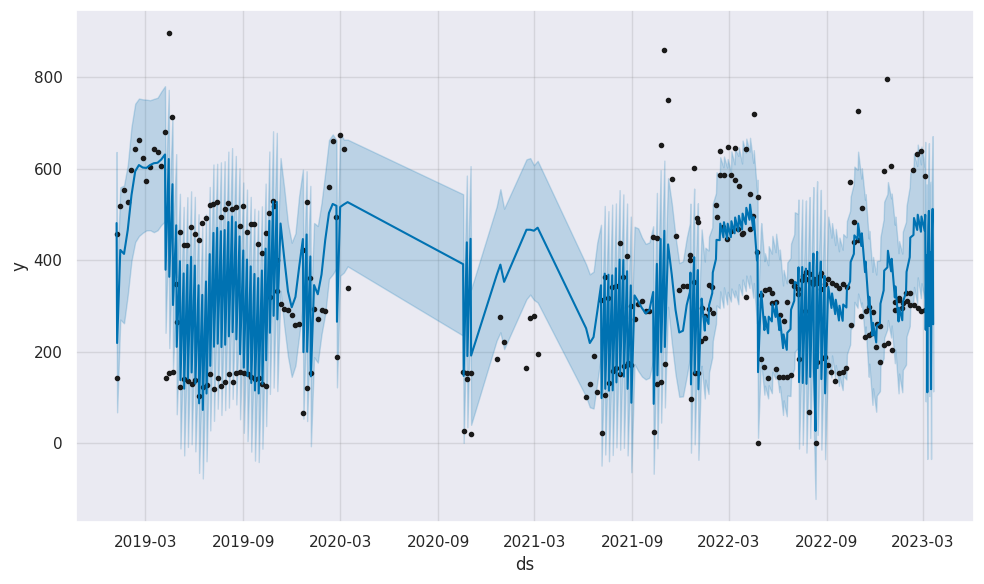

In [ ]:
fig_1 = baseline_model.plot(forecast_df)

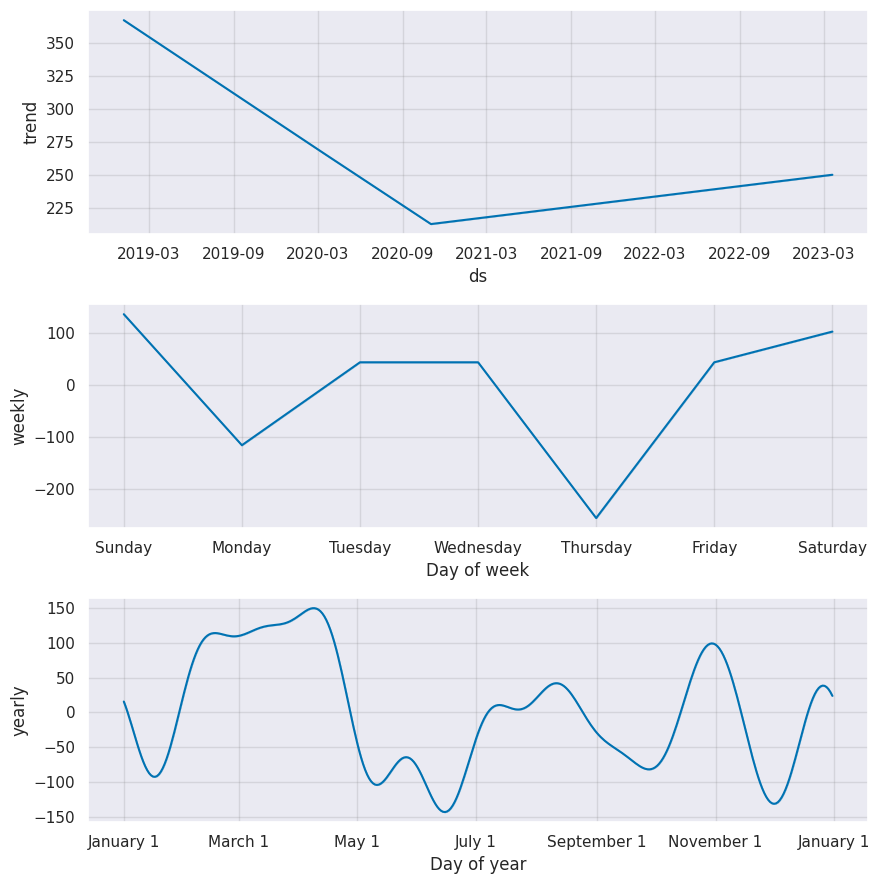

In [ ]:
fig_2 = baseline_model.plot_components(forecast_df)

### Evaluate performance

In [ ]:
from prophet.diagnostics import cross_validation

In [ ]:
#5 fold de 3 mois

eval_df = cross_validation(baseline_model, initial = '366 days', period = '90 days', horizon = '90 days')

INFO:prophet:Making 10 forecasts with cutoffs between 2020-09-16 00:00:00 and 2022-12-05 00:00:00


  0%|          | 0/10 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpagjeuw9p/mggjc4su.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpagjeuw9p/g8bw2qvo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57196', 'data', 'file=/tmp/tmpagjeuw9p/mggjc4su.json', 'init=/tmp/tmpagjeuw9p/g8bw2qvo.json', 'output', 'file=/tmp/tmpagjeuw9p/prophet_modelwlkht560/prophet_model-20230601121204.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:12:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:12:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpagjeuw9p/owub57gv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpagjeuw9p/dk9r02dh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

In [ ]:
eval_df
#1er cut : jusqu'a 16 sept 2020 => prévision 30 jours plus tard : 18 oct prévision est de 447
#Il s'arrete a la cutoff date et predict (yhat) a la date ds
#Il c'est arréter le 5 decembre 2022 et il a prédit pour le 5 mars 2023, prédit 555 alors que la vrai valeure est 290 => pb lié au c

ds        yhat  yhat_lower  yhat_upper      y     cutoff
0   2020-10-18  447.472952  360.748870  543.171200  155.0 2020-09-16
1   2020-10-19  124.280990   26.530738  212.052161   26.0 2020-09-16
2   2020-10-25  488.585274  397.886753  581.855110  152.0 2020-09-16
3   2020-10-26  153.801841   59.525094  247.796179  139.0 2020-09-16
4   2020-11-01  439.584883  343.232430  531.279262   20.0 2020-09-16
..         ...         ...         ...         ...    ...        ...
189 2023-02-19  562.993455  427.633860  696.048189  296.0 2022-12-05
190 2023-02-25  465.255019  325.160057  609.628261  638.0 2022-12-05
191 2023-02-26  553.509927  421.732892  687.211062  289.0 2022-12-05
192 2023-03-04  465.385062  321.655951  599.951719  584.0 2022-12-05
193 2023-03-05  555.602132  405.647984  702.014426  290.0 2022-12-05

[194 rows x 6 columns]

In [ ]:
from prophet.diagnostics import performance_metrics

In [ ]:
performance_metrics(eval_df)

INFO:prophet:Skipping MAPE because y close to 0


horizon           mse        rmse         mae     mdape     smape  coverage
0  10 days   7964.572025   89.244451   72.291339  0.209460  0.282279  0.684211
1  11 days   9346.762087   96.678654   78.280908  0.227023  0.317436  0.657895
2  12 days  12625.430698  112.362942   86.326633  0.209460  0.325730  0.684211
3  13 days  13687.832616  116.995011   90.400662  0.229651  0.334530  0.657895
4  14 days  12874.968302  113.467918   85.317102  0.192882  0.318882  0.684211
..     ...           ...         ...         ...       ...       ...       ...
76 86 days  35044.098263  187.200690  154.016154  0.566636  0.616390  0.403509
77 87 days  31087.535293  176.316577  150.802874  0.497562  0.555897  0.368421
78 88 days  28591.350991  169.089772  142.621852  0.445899  0.528505  0.368421
79 89 days  24919.942869  157.860517  131.487817  0.388496  0.490253  0.473684
80 90 days  27910.967928  167.065759  140.636592  0.497562  0.575879  0.421053

[81 rows x 7 columns]

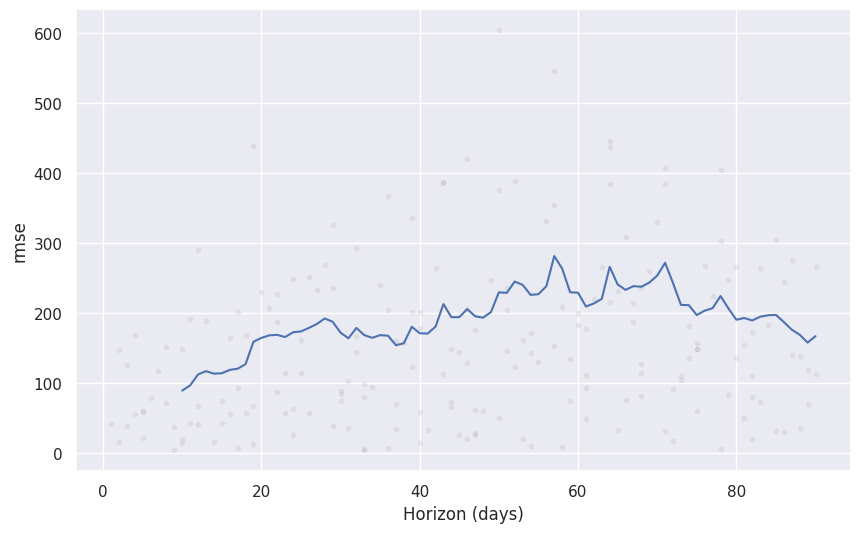

In [ ]:
from prophet.plot import plot_cross_validation_metric

plot_cross_validation_metric(eval_df, metric = 'rmse');

### Automate model fitting and evaluation

In [ ]:
routes = (traffic_df
 .drop_duplicates(subset = ['home_airport', 'paired_airport'])
 [['home_airport', 'paired_airport']]
 .to_dict(orient = 'rows')
) 

<ipython-input-37-0acd6a792109>:1: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.



In [ ]:
routes

[{'home_airport': 'LGW', 'paired_airport': 'BCN'},
 {'home_airport': 'LGW', 'paired_airport': 'AMS'},
 {'home_airport': 'LIS', 'paired_airport': 'ORY'},
 {'home_airport': 'LIS', 'paired_airport': 'OPO'},
 {'home_airport': 'SSA', 'paired_airport': 'GRU'},
 {'home_airport': 'NTE', 'paired_airport': 'FUE'},
 {'home_airport': 'LYS', 'paired_airport': 'PIS'},
 {'home_airport': 'PNH', 'paired_airport': 'NGB'},
 {'home_airport': 'POP', 'paired_airport': 'JFK'},
 {'home_airport': 'SCL', 'paired_airport': 'LHR'}]

In [ ]:
#Permet de supprimer les DEBUG dans le code suivant => n'affiche que les messages de niveau WARNING
import logging 
logging.getLogger('cmdstanpy').setLevel(logging.WARNING)

In [ ]:
models = dict()
performances = dict()

#models = {}
#performances = {}

for route in routes:
  print(route)
  home = route['home_airport']
  paired = route['paired_airport']

  #Build route traffic dataframe
  _df = generate_route_df(traffic_df, home, paired)

  #create a model 
  _model = Prophet()

  #Fit & evaluate the model
  _model.fit(_df.rename(columns ={'date': 'ds', 'pax_total':'y'}))

  #Cross validate the model
  ##parallel : permet de calculer plusieurs modeles en même temps
  _cv_df = cross_validation(_model, horizon = '90 days', parallel = "processes")
  ## rolling_window = 1 dit au model de sélectionner toutes les données, de base il n'en sélectionne que 10%
  _perf_df = performance_metrics(_cv_df, rolling_window = 1)

  #Save the model to a dictionnary
  models[(route['home_airport'], route['paired_airport'])] = _model
  performances[(route['home_airport'], route['paired_airport'])] = _perf_df['rmse'].values[0]

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'LGW', 'paired_airport': 'BCN'}


INFO:prophet:Making 49 forecasts with cutoffs between 2017-01-10 00:00:00 and 2022-12-10 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f2e44af3f70>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'LGW', 'paired_airport': 'AMS'}


INFO:prophet:Making 49 forecasts with cutoffs between 2017-01-09 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f2e44b7b7c0>
INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'LIS', 'paired_airport': 'ORY'}


INFO:prophet:Making 49 forecasts with cutoffs between 2017-01-09 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f2e44248ac0>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'LIS', 'paired_airport': 'OPO'}


INFO:prophet:Making 49 forecasts with cutoffs between 2017-01-09 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f2e444142e0>
INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'SSA', 'paired_airport': 'GRU'}


INFO:prophet:Making 24 forecasts with cutoffs between 2020-02-08 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f2e44b7b7c0>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 20 forecasts with cutoffs between 2020-08-02 00:00:00 and 2022-12-05 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f2e44710d60>


{'home_airport': 'NTE', 'paired_airport': 'FUE'}


INFO:prophet:Skipping MAPE because y close to 0
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Making 26 forecasts with cutoffs between 2018-11-24 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f2e493d8790>


{'home_airport': 'LYS', 'paired_airport': 'PIS'}


INFO:prophet:n_changepoints greater than number of observations. Using 5.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
INFO:prophet:n_changepoints greater than number of observations. Using 12.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
INFO:prophet:n_changepoints greater than number of observations. Using 16.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
INFO:prophet:n_changepoints greater than number of observations. Using 17.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
INFO:prophet:n_changepoints greater than number of observations. Using 19.
INFO:prophet:n_changepoints g

{'home_airport': 'PNH', 'paired_airport': 'NGB'}


INFO:prophet:Making 11 forecasts with cutoffs between 2017-10-02 00:00:00 and 2022-12-07 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f2e447135e0>
INFO:prophet:n_changepoints greater than number of observations. Using 0.
INFO:prophet:n_changepoints greater than number of observations. Using 0.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
INFO:prophet:n_changepoints greater than number of observations. Using 24.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'POP', 'paired_airport': 'JFK'}


INFO:prophet:Making 32 forecasts with cutoffs between 2019-02-13 00:00:00 and 2022-12-09 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f2e44564dc0>
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


{'home_airport': 'SCL', 'paired_airport': 'LHR'}


INFO:prophet:Making 13 forecasts with cutoffs between 2020-01-04 00:00:00 and 2022-12-07 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7f2e4487ccd0>


In [ ]:
models

{('LGW', 'BCN'): <prophet.forecaster.Prophet at 0x7f2e4489f010>,
 ('LGW', 'AMS'): <prophet.forecaster.Prophet at 0x7f2e43aece50>,
 ('LIS', 'ORY'): <prophet.forecaster.Prophet at 0x7f2e4489c7c0>,
 ('LIS', 'OPO'): <prophet.forecaster.Prophet at 0x7f2e43a337c0>,
 ('SSA', 'GRU'): <prophet.forecaster.Prophet at 0x7f2e43c3d630>,
 ('NTE', 'FUE'): <prophet.forecaster.Prophet at 0x7f2e43da7ee0>,
 ('LYS', 'PIS'): <prophet.forecaster.Prophet at 0x7f2e43b20eb0>,
 ('PNH', 'NGB'): <prophet.forecaster.Prophet at 0x7f2e44713b80>,
 ('POP', 'JFK'): <prophet.forecaster.Prophet at 0x7f2e44417bb0>,
 ('SCL', 'LHR'): <prophet.forecaster.Prophet at 0x7f2e4489efe0>}

In [ ]:
performances

{('LGW', 'BCN'): 1252.80455530257,
 ('LGW', 'AMS'): 927.4295007587415,
 ('LIS', 'ORY'): 871.9787557259463,
 ('LIS', 'OPO'): 607.0948037131809,
 ('SSA', 'GRU'): 1952.9757983596164,
 ('NTE', 'FUE'): 192.23652122836083,
 ('LYS', 'PIS'): 632.5392618552802,
 ('PNH', 'NGB'): 1562.754400403463,
 ('POP', 'JFK'): 76.63391104712609,
 ('SCL', 'LHR'): 146.91799138474485}

### Save models

In [ ]:
from prophet.serialize import model_to_json, model_from_json
#model[0] et model[1] renvoie LGW et BCN... du dict models

for model in models:
  _filename ='route_model_prophet_{home}_{paired}.json'.format(home = model[0], paired = model[1])
  #Save the file
  #w pour dire que l'on veut extraire le json
  with open(_filename, 'w') as f:
    f.write(model_to_json(models[model]))

In [ ]:
reload_models = dict()

In [ ]:
for route in routes:
  _filename ='route_model_prophet_{home}_{paired}.json'.format(home = route['home_airport'],
                                                               paired = route['paired_airport'])
  # r pour indiquer que je veux lire le fichier
  with open(_filename, 'r') as f:
    reload_models[(route['home_airport'], route['paired_airport'])] = model_from_json(f.read())

/usr/local/lib/python3.10/dist-packages/prophet/serialize.py:160: FutureWarning:

The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')

/usr/local/lib/python3.10/dist-packages/prophet/serialize.py:160: FutureWarning:

The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')

/usr/local/lib/python3.10/dist-packages/prophet/serialize.py:160: FutureWarning:

The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtim

In [ ]:
reload_models #avec json

{('LGW', 'BCN'): <prophet.forecaster.Prophet at 0x7f2e4487dc00>,
 ('LGW', 'AMS'): <prophet.forecaster.Prophet at 0x7f2e4487f490>,
 ('LIS', 'ORY'): <prophet.forecaster.Prophet at 0x7f2e493ae860>,
 ('LIS', 'OPO'): <prophet.forecaster.Prophet at 0x7f2e4487df60>,
 ('SSA', 'GRU'): <prophet.forecaster.Prophet at 0x7f2e493afa90>,
 ('NTE', 'FUE'): <prophet.forecaster.Prophet at 0x7f2e4487ec50>,
 ('LYS', 'PIS'): <prophet.forecaster.Prophet at 0x7f2e493ae560>,
 ('PNH', 'NGB'): <prophet.forecaster.Prophet at 0x7f2e43467790>,
 ('POP', 'JFK'): <prophet.forecaster.Prophet at 0x7f2e4487c8e0>,
 ('SCL', 'LHR'): <prophet.forecaster.Prophet at 0x7f2e42ac1900>}

In [ ]:
from joblib import dump, load

In [ ]:
from prophet.serialize import model_to_json, model_from_json

for model in models:
  _filename ='route_model_prophet_{home}_{paired}.joblib'.format(home = model[0], paired = model[1])
  dump(models[model], _filename)

In [ ]:
reload_models = dict()

for route in routes:
  _filename ='route_model_prophet_{home}_{paired}.joblib'.format(home = route['home_airport'],
                                                               paired = route['paired_airport'])
  reload_models[(route['home_airport'], route['paired_airport'])] = load(_filename)

In [ ]:
reload_models #avec joblib

{('LGW', 'BCN'): <prophet.forecaster.Prophet at 0x7f2e42a13be0>,
 ('LGW', 'AMS'): <prophet.forecaster.Prophet at 0x7f2e42a13df0>,
 ('LIS', 'ORY'): <prophet.forecaster.Prophet at 0x7f2e42a97730>,
 ('LIS', 'OPO'): <prophet.forecaster.Prophet at 0x7f2e42a97fd0>,
 ('SSA', 'GRU'): <prophet.forecaster.Prophet at 0x7f2e42a97640>,
 ('NTE', 'FUE'): <prophet.forecaster.Prophet at 0x7f2e42a97ca0>,
 ('LYS', 'PIS'): <prophet.forecaster.Prophet at 0x7f2e42a97340>,
 ('PNH', 'NGB'): <prophet.forecaster.Prophet at 0x7f2e42a94100>,
 ('POP', 'JFK'): <prophet.forecaster.Prophet at 0x7f2e42dc6fe0>,
 ('SCL', 'LHR'): <prophet.forecaster.Prophet at 0x7f2e42dc7940>}

### Model with Nixtla

In [ ]:
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

models = [
    lgb.LGBMRegressor(),
    xgb.XGBRegressor(),
    RandomForestRegressor(random_state=0),
]

### ML Model

In [ ]:
import lightgbm as lgb
import xgboost as xgb

from sklearn.ensemble import RandomForestRegressor
from mlforecast import MLForecast

from numba import njit
from window_ops.expanding import expanding_mean
from window_ops.rolling import rolling_mean


tested_models = [
    lgb.LGBMRegressor(),
    xgb.XGBRegressor(),
    RandomForestRegressor(random_state=0),
]

#rolling_mean_28: calcul moyenne glissante sur 28 jours
@njit
def rolling_mean_28(x):
    return rolling_mean(x, window_size=28)

#MlForecast: construit forecast en utilisant tout les modéles listé
fcst = MLForecast(
    models=tested_models,
    freq='D',
    lags=[7, 14, 21, 28],
    lag_transforms={
        1: [expanding_mean],
        7: [rolling_mean_28]
    },
    date_features=['dayofweek'],
    differences=[1],
)

/usr/local/lib/python3.10/dist-packages/mlforecast/core.py:151: UserWarning:

The differences argument is deprecated and will be removed in a future version.
Please pass an `mlforecast.target_transforms.Differences` instance to the `target_transforms` argument instead.



In [ ]:
nixtla_model = fcst.fit(generate_route_df(traffic_df,"LGW", "AMS").drop(columns = ['paired_airport']), 
          id_col = 'home_airport', time_col = 'date', target_col = 'pax_total')

In [ ]:
predict_df = nixtla_model.predict(14)
predict_df

home_airport       date  LGBMRegressor  XGBRegressor  RandomForestRegressor
0           LGW 2023-03-10    2522.142311   2416.332520                2447.83
1           LGW 2023-03-11    1375.064901   1125.572388                1219.15
2           LGW 2023-03-12    2385.056909   1795.271851                2252.45
3           LGW 2023-03-13    1667.920360   1334.042480                1824.71
4           LGW 2023-03-14    1650.751786   1582.571167                1633.86
5           LGW 2023-03-15    1418.832738   1090.876709                1259.96
6           LGW 2023-03-16    2099.141695   1895.774170                2080.54
7           LGW 2023-03-17    2409.705368   2147.150146                2365.46
8           LGW 2023-03-18    1465.166364   1006.790649                1080.81
9           LGW 2023-03-19    2544.719226   1646.215820                2135.46
10          LGW 2023-03-20    1903.983106   1334.463745                1858.66
11          LGW 2023-03-21    1468.840952   1440.680298                1535.54
12          LGW 2023-03-22    1461.127450   1616.794922                1597.83
13          LGW 2023-03-23    2089.815550   2439.141602                2501.09

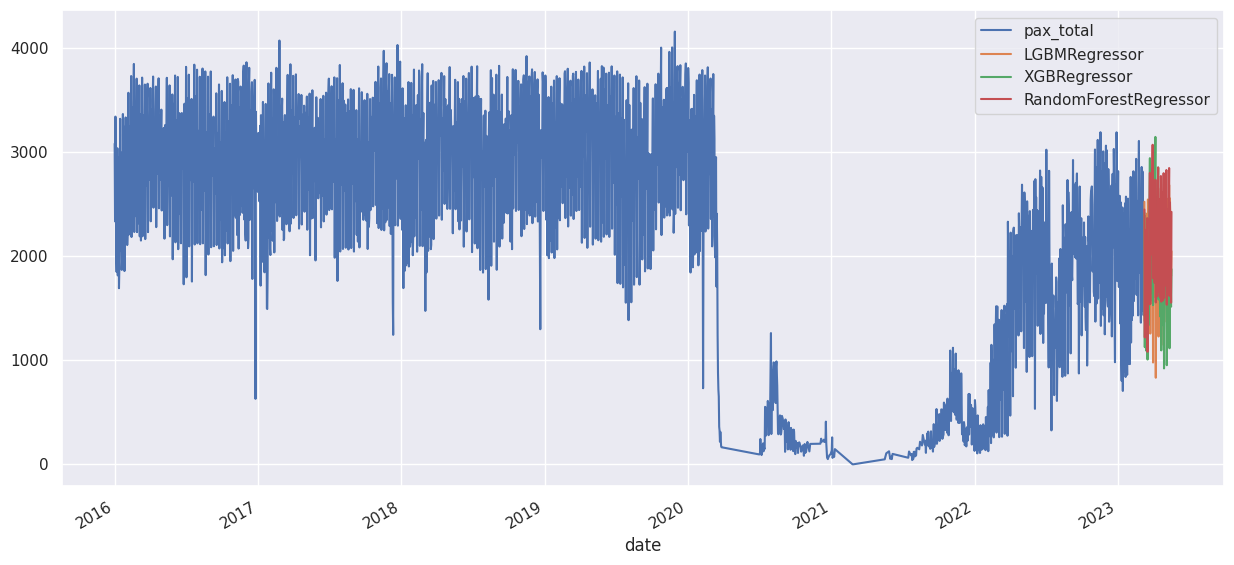

In [ ]:
(pd.concat([generate_route_df(traffic_df, 'LGW', 'AMS').drop(columns=['paired_airport']),
            nixtla_model.predict(7*10)])
.set_index('date')
).plot(figsize=(15, 7));

In [ ]:
draw_ts_multiple((pd.concat([generate_route_df(traffic_df, 'LGW', 'AMS').drop(columns=['paired_airport']),
                             nixtla_model.predict(7*10)])),
                 v1='pax_total', v2='LGBMRegressor');

In [ ]:
crossvalidation_df = fcst.cross_validation(
    data=generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']),
    window_size=90,
    n_windows=5,
    id_col='home_airport',
    time_col='date',
    target_col='pax_total'
)
crossvalidation_df

/usr/local/lib/python3.10/dist-packages/mlforecast/forecast.py:576: UserWarning:

Excuting `cross_validation` after `fit` can produce unexpected errors



home_airport       date     cutoff  pax_total  LGBMRegressor  XGBRegressor  \
0           LGW 2021-12-15 2021-12-14      229.0     348.645547    281.325165   
1           LGW 2021-12-16 2021-12-14      429.0     593.762678    508.705139   
2           LGW 2021-12-17 2021-12-14      676.0     670.195026    623.942871   
3           LGW 2021-12-18 2021-12-14      286.0     409.170319    532.024414   
4           LGW 2021-12-19 2021-12-14      676.0     803.159270    850.288818   
..          ...        ...        ...        ...            ...           ...   
85          LGW 2023-03-05 2022-12-09     2815.0    1865.829097   2310.340332   
86          LGW 2023-03-06 2022-12-09     1916.0    2222.291755   2665.737549   
87          LGW 2023-03-07 2022-12-09     1741.0    2131.488022   1903.722290   
88          LGW 2023-03-08 2022-12-09     1432.0    2069.155381   1967.471924   
89          LGW 2023-03-09 2022-12-09     2029.0    2307.119953   2178.843750   

    RandomForestRegressor  
0                  267.72  
1                  428.76  
2                  445.82  
3                  339.56  
4                  678.39  
..                    ...  
85                1553.94  
86                1668.80  
87                1928.02  
88                2089.95  
89                2303.74  

[450 rows x 7 columns]

In [ ]:
import numpy as np

def mse(y, y_hat):
  delta_y = np.square(y - y_hat)
  return np.nanmean(delta_y)

def rmse(y, y_hat):
  return np.sqrt(mse(y, y_hat))

In [ ]:
cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['LGBMRegressor'])).mean()
print("LGBM RMSE using cross-validation: ", cv_rmse)
cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['RandomForestRegressor'])).mean()
print("RandomForest RMSE using cross-validation: ", cv_rmse)
cv_rmse = crossvalidation_df.groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['XGBRegressor'])).mean()
print("XGBoost RMSE using cross-validation: ", cv_rmse)
#CV model par model : RF best result

cv_rmse = (crossvalidation_df
           .assign(Ensemble = lambda _df: _df[['LGBMRegressor','RandomForestRegressor', 'XGBRegressor']].mean(axis = 1))
           .groupby(['home_airport', 'cutoff']).apply(lambda df: rmse(df['pax_total'], df['Ensemble'])).mean())
print("Ensemble RMSE using cross-validation: ", cv_rmse)

LGBM RMSE using cross-validation:  1123.0405776208863
RandomForest RMSE using cross-validation:  1013.2061289311698
XGBoost RMSE using cross-validation:  1220.3735710301205
Ensemble RMSE using cross-validation:  1047.6225207933953


### Model with neural forecast

In [ ]:
!pip install neuralforecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.8/141.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.0/719.0 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 97.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 67.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [ ]:
from neuralforecast import NeuralForecast
from neuralforecast.models import NBEATS, NHITS

horizon = 90
models = [NBEATS(input_size=2 * horizon, h=horizon, max_epochs=50),
          NHITS(input_size=2 * horizon, h=horizon, max_epochs=50)]
          
nforecast = NeuralForecast(models=models, freq='D')
nforecast.fit(df=generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']).rename(columns={'home_airport': 'unique_id',
                                                                                                      'date': 'ds',
                                                                                                      'pax_total': 'y'}))

INFO:lightning_fabric.utilities.seed:Global seed set to 1
INFO:lightning_fabric.utilities.seed:Global seed set to 1


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

In [ ]:
nforecast.predict().reset_index()

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

unique_id         ds       NBEATS        NHITS
0        LGW 2023-03-10  2265.771729  2095.367188
1        LGW 2023-03-11  1099.371582  1419.447144
2        LGW 2023-03-12  1955.275635  1915.259521
3        LGW 2023-03-13  1979.947266  2003.247070
4        LGW 2023-03-14  1705.986816  1756.988159
..       ...        ...          ...          ...
85       LGW 2023-06-03  1152.167725  1497.580322
86       LGW 2023-06-04  1912.655151  1860.950806
87       LGW 2023-06-05  2048.486328  1970.539673
88       LGW 2023-06-06  1654.967651  1637.420532
89       LGW 2023-06-07  1523.215088  1622.174805

[90 rows x 4 columns]

Predicting: 0it [00:00, ?it/s]

Predicting: 0it [00:00, ?it/s]

<Axes: xlabel='ds'>

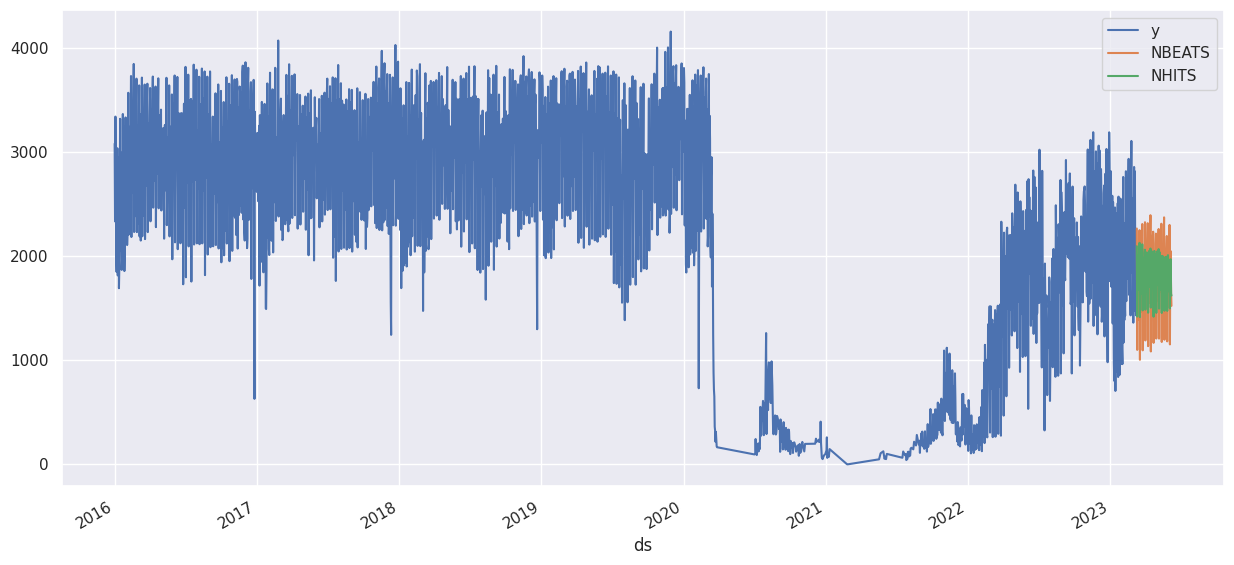

In [ ]:
pd.concat(
    [
        generate_route_df(traffic_df, "LGW", "AMS").drop(columns=['paired_airport']).rename(columns={'home_airport': 'unique_id',
                                                                                                     'date': 'ds',
                                                                                                     'pax_total': 'y'}),
        nforecast.predict().reset_index()
    ]
).set_index('ds').plot(figsize=(15,7))